# LNR - Práctica 1
## Sesión 3: NLTK. POS tagging

Nombre:
- Guillermo Ferrando Muñoz

### Ejercicio 1: Procesamiento del corpus cess_esp anotado con información morfosintáctica.

   a. Descargar corpus usando NLTK.

In [8]:
import nltk

In [11]:
from nltk.corpus import cess_esp
nltk.download('cess_esp')

b. Procesar el corpus para transformar la anotación de las etiquetas
originales (289 etiquetas) a un conjunto reducido (66 etiquetas).
Para realizar esta transformación utilizar los siguientes criterios:
todas las etiquetas serán de longitud igual a 2 por defecto, salvo
los verbos (v) y los signos de puntuación (F) que pueden ser de
tres. También pueden existir etiquetas de longitud =1. En el
conjunto transformado también se deben eliminar anotaciones
de la forma: `(u'*0*', u'sn')`.

In [9]:
#cess_esp.ensure_loaded()
help(cess_esp)

Help on BracketParseCorpusReader in module nltk.corpus.reader.bracket_parse object:

class BracketParseCorpusReader(nltk.corpus.reader.api.SyntaxCorpusReader)
 |  BracketParseCorpusReader(root, fileids, comment_char=None, detect_blocks='unindented_paren', encoding='utf8', tagset=None)
 |  
 |  Reader for corpora that consist of parenthesis-delineated parse trees,
 |  like those found in the "combined" section of the Penn Treebank,
 |  e.g. "(S (NP (DT the) (JJ little) (NN dog)) (VP (VBD barked)))".
 |  
 |  Method resolution order:
 |      BracketParseCorpusReader
 |      nltk.corpus.reader.api.SyntaxCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, fileids, comment_char=None, detect_blocks='unindented_paren', encoding='utf8', tagset=None)
 |      :param root: The root directory for this corpus.
 |      :param fileids: A list or regexp specifying the fileids in this corpus.
 |      :param commen

Parece que el método `tagged_sents()` es el que contiene las etiquetas originales. Vamos a comprobar si tiene 289 como se indica en el enunciado.

In [24]:
originales = cess_esp.tagged_sents()
lista=[]
for i in originales:
    for j,k in i:
        if k not in lista:
            lista.append(k)

In [26]:
len(lista) #comprobado

289

Procedemos a transformar el corpus en un conjunto reducido con 66 etiquetas.

In [75]:
transformadas=[]
conjunto=set() #para contar las no repetidas
for i in originales:
    listaparcial=[]
    for j,k in i:
        if j != "*0*":
            if 'v'==k[0] or 'F'==k[0]:
                listaparcial.append((j,k[0:3]))
                conjunto.add(k[0:3])
            else:
                listaparcial.append((j,k[0:2]))
                conjunto.add(k[0:2])
    transformadas.append(listaparcial)
len(conjunto)

66

In [78]:
print(originales[0])

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]


In [77]:
print(transformadas[0])

[('El', 'da'), ('grupo', 'nc'), ('estatal', 'aq'), ('Electricité_de_France', 'np'), ('-Fpa-', 'Fpa'), ('EDF', 'np'), ('-Fpt-', 'Fpt'), ('anunció', 'vmi'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da'), ('compra', 'nc'), ('del', 'sp'), ('51_por_ciento', 'Zp'), ('de', 'sp'), ('la', 'da'), ('empresa', 'nc'), ('mexicana', 'aq'), ('Electricidad_Águila_de_Altamira', 'np'), ('-Fpa-', 'Fpa'), ('EAA', 'np'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq'), ('por', 'sp'), ('el', 'da'), ('japonés', 'aq'), ('Mitsubishi_Corporation', 'np'), ('para', 'sp'), ('poner_en_marcha', 'vmn'), ('una', 'di'), ('central', 'nc'), ('de', 'sp'), ('gas', 'nc'), ('de', 'sp'), ('495', 'Z'), ('megavatios', 'nc'), ('.', 'Fp')]


### Ejercicio 2: Uso de etiquetadores morfosintácticos (usar hmm).

In [80]:
from nltk.tag import hmm 
help(hmm)

Help on module nltk.tag.hmm in nltk.tag:

NAME
    nltk.tag.hmm

DESCRIPTION
    Hidden Markov Models (HMMs) largely used to assign the correct label sequence
    to sequential data or assess the probability of a given label and data
    sequence. These models are finite state machines characterised by a number of
    states, transitions between these states, and output symbols emitted while in
    each state. The HMM is an extension to the Markov chain, where each state
    corresponds deterministically to a given event. In the HMM the observation is
    a probabilistic function of the state. HMMs share the Markov chain's
    assumption, being that the probability of transition from one state to another
    only depends on the current state - i.e. the series of states that led to the
    current state are not used. They are also time invariant.
    
    The HMM is a directed graph, with probability weighted edges (representing the
    probability of a transition between the source and

a. Dividir el corpus en dos partes: training (el 90% de las primeras
frases) y de test (el 10% restante).

In [84]:
tr=int(len(transformadas)*0.9) #índice de partición

In [86]:
training=transformadas[:tr]
test=transformadas[tr:]

b. Saber entrenar el etiquetador con la partición de entrenamiento
previamente transformada.

Consultando la ayuda de hmm, vemos que tenemos una clase llamada `vHiddenMarkovModelTagger`, con un método `train()`. Deduzco que ese es el método que necesito:

In [87]:
etiquetador=nltk.HiddenMarkovModelTagger.train(training)

c. Saber etiquetar un conjunto de test con el modelo aprendido.

d. Evaluar las prestaciones de un etiquetador.

In [125]:
etiquetador.test(test) #el modelo tiene una precisión del 87,84%. Es un buen resultado.

accuracy over 13434 tokens: 87.84


In [128]:
round(etiquetador.evaluate(test),4)

0.8784

### Ejericicio 3: Hacer una evaluación de las prestaciones de etiquetado usando todo elcorpus (10-fold cross validation).
Se propone hacer las 10 particiones usando el corpus reducido en el orden original y barajándolo (sugerencia: se puede usar el método shuffle importándolo del módulo random “from random import shuffle”). Comprobar si al barajar el corpus se observan diferencias en los resultados de cada partición.

In [91]:
from random import shuffle
help(shuffle)

Help on method shuffle in module random:

shuffle(x, random=None) method of random.Random instance
    Shuffle list x in place, and return None.
    
    Optional argument random is a 0-argument function returning a
    random float in [0.0, 1.0); if it is the default None, the
    standard random.random will be used.



In [99]:
copiatransformadas = transformadas.copy() #hacemos una copia del conjunto transformado
shuffle(copiatransformadas)
print(transformadas[0])
print()
print(copiatransformadas[0]) #la primera línea de la copia no coincide, se ha barajado
print()
print(len(copiatransformadas)==len(transformadas))

[('El', 'da'), ('grupo', 'nc'), ('estatal', 'aq'), ('Electricité_de_France', 'np'), ('-Fpa-', 'Fpa'), ('EDF', 'np'), ('-Fpt-', 'Fpt'), ('anunció', 'vmi'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da'), ('compra', 'nc'), ('del', 'sp'), ('51_por_ciento', 'Zp'), ('de', 'sp'), ('la', 'da'), ('empresa', 'nc'), ('mexicana', 'aq'), ('Electricidad_Águila_de_Altamira', 'np'), ('-Fpa-', 'Fpa'), ('EAA', 'np'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq'), ('por', 'sp'), ('el', 'da'), ('japonés', 'aq'), ('Mitsubishi_Corporation', 'np'), ('para', 'sp'), ('poner_en_marcha', 'vmn'), ('una', 'di'), ('central', 'nc'), ('de', 'sp'), ('gas', 'nc'), ('de', 'sp'), ('495', 'Z'), ('megavatios', 'nc'), ('.', 'Fp')]

[('Las', 'da'), ('tropas', 'nc'), ('agresoras', 'aq'), ('encontrarían', 'vmi'), ('un', 'di'), ('país', 'nc'), ('indefenso', 'aq'), ('y', 'cc'), ('una', 'di'), ('población', 'nc'), ('destruida', 'aq'), (',', 'Fc'), ('muerta', 'aq'), ('o', 'cc'), ('incapacitada', 'aq'), (

Utilizaremos la librería sklearn para hacer los 10 folds.

In [108]:
from sklearn.model_selection import KFold
#help(KFold)

In [131]:
kf=KFold(n_splits=10)
kf.split(copiatransformadas)
resultadosprev=[]
for n,(tra,tes) in enumerate(kf.split(transformadas)):
    #print(f"TRAIN {n}: ", tra)
    #print(f"TEST {n}: ", tes)
    trainn=transformadas[tra[0]:tra[len(tra)-1]]
    testt=transformadas[tes[0]:tes[len(tes)-1]]
    etiquetadornew = nltk.HiddenMarkovModelTagger.train(trainn)
    precision = round(etiquetadornew.evaluate(testt),4)
    resultadosprev.append(precision)
resultadosprev #precisiones con los datos sin barajar

[0.9284,
 0.9787,
 0.9786,
 0.9792,
 0.9797,
 0.9616,
 0.9622,
 0.9708,
 0.9628,
 0.8784]

In [130]:
kf=KFold(n_splits=10)
kf.split(copiatransformadas)
resultados=[]
for n,(tra,tes) in enumerate(kf.split(copiatransformadas)):
    #print(f"TRAIN {n}: ", tra)
    #print(f"TEST {n}: ", tes)
    trainn=copiatransformadas[tra[0]:tra[len(tra)-1]]
    testt=copiatransformadas[tes[0]:tes[len(tes)-1]]
    etiquetadornew = nltk.HiddenMarkovModelTagger.train(trainn)
    precision = round(etiquetadornew.evaluate(testt),4)
    resultados.append(precision)
resultados #precisiones con los datos barajados

[0.9258,
 0.9712,
 0.9719,
 0.9732,
 0.9722,
 0.9731,
 0.9732,
 0.9756,
 0.9734,
 0.9251]

A continuación, haremos unos gráficos de barras para comparar los resultados de los datos barajados y sin barajar:

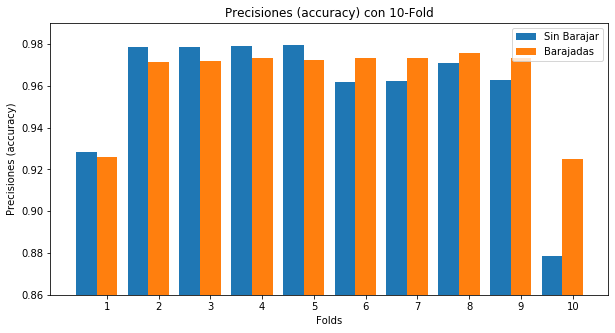

In [146]:
import matplotlib.pyplot as plt
import numpy as np

kf = 10
ejex = np.arange(k)
ancho = 0.4
plt.figure(figsize=(10,5))
plt.ylim(0.86,0.99)
plt.bar(ejex, resultadosprev, width=ancho, label="Sin Barajar")
plt.bar(ejex+ancho, resultados, width=ancho, label="Barajadas")
plt.legend(loc='best')
plt.xticks(ejex+ancho, ('1','2','3','4','5','6','7','8','9','10'))
plt.title("Precisiones (accuracy) con 10-Fold")
plt.xlabel("Folds")
plt.ylabel("Precisiones (accuracy)")
plt.show();

Podemos observar que los resultados son muy similares en sobre el total. En la primera mitad ganan los datos sin barajar y en el segunda los barajados. Eso sí, en el fold número 10, hay una notable diferencia con ventaja a los barajados.